<a href="https://colab.research.google.com/github/adriano06-tech/covid19_vaccination_progress/blob/main/covid19_vaccination_progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><strong>Perguntas que teremos que responder:</strong></h1>
<ul>
<li>1 - Quais vacinas são usadas em cada país?</li>
<li>2 - Qual país vacinou mais pessoas? -> Pessoas 100% vacinadas</li>
<li>3 - Progressão de vacinação no mundo.</li>
</ul>

<a href="https://www.kaggle.com/gpreda/covid-world-vaccination-progress/download">Instalação da base de dados caso algum erro tenha ocorrido</a>

# Importando a base de dados

In [1]:
import pandas as pd
import numpy as np

# Primeiro importamos a base de dados

df = pd.read_csv('country_vaccinations.csv')
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [2]:
# Percebemos que o DataFrame possui dados nulos, e se analisarmos, aonde os dados são nulos,
# eles representam zero, então, para facilitar a plotagem dos gráficos vamos usar o método "fillna()"
# e passar como parâmetro o "0", que vai ser o valor que vamos substituir

df = df.fillna(0)

# Agora vamos pedir para ele nos mostrar o nosso DataFrame para verificar se os dados foram inseridos corretamente

df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,0.0,0.0,0.0,0.0,64.0,0.00,0.00,0.0,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,0.0,0.0,64.0,0.00,0.00,0.0,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,0.0,60.0,63.0,0.01,0.01,0.0,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,0.0,78.0,66.0,0.01,0.01,0.0,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [3]:
# Funcionou!!! Agora vamos reparar outro problema

df.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

In [4]:
# Repare acima que o tipo da data dos dados é do tipo "object", o "object".
# O tipo "object" é nada mais que uma string do pandas.
# Mas isso é um grande problema se nós quisermos plotar um gráfico temporal por exemplo.
# Para resolver nosso problema vamos definir a nossa coluna com o tipo "datetime" do pandas a partir de agora.
# Para isso precisaremos executar o código abaixo:

df['date'] = pd.to_datetime(df['date'])

df.dtypes

country                                        object
iso_code                                       object
date                                   datetime64[ns]
total_vaccinations                            float64
people_vaccinated                             float64
people_fully_vaccinated                       float64
daily_vaccinations_raw                        float64
daily_vaccinations                            float64
total_vaccinations_per_hundred                float64
people_vaccinated_per_hundred                 float64
people_fully_vaccinated_per_hundred           float64
daily_vaccinations_per_million                float64
vaccines                                       object
source_name                                    object
source_website                                 object
dtype: object

In [5]:
# Repare que a partir de agora, a nossa coluna "date" é do tipo datetime

# Análise 1 - Quais vacinas são usadas em cada país.

In [6]:
# Nesse caso não plotaremos nenhum gráfico, apenas vamos criar um DataFrame do pandas
# para responder nossa pergunta visualmente

In [7]:
# Vamos começar criando uma lista com todos os nomes dos países

country_name_list = df['country'].drop_duplicates()

# Repare que usamos um método do pandas, o "drop_duplicates()".
# Ele simplesmente pega todos os valores daquela coluna e nos retornar sem repetições dos nomes.

print(f'Temos {len(country_name_list)} países na nossa base de dados')

Temos 107 países na nossa base de dados


In [8]:
# Vamos criar agora um dicionário que vai ser aonde nós iremos guardar as vacinas usadadas
# de cada país

vaccines_dict = {}

# Vamos agora usar um loop para adicionar cada país ao dicionário

for country in country_name_list:
  vaccines_dict[country] = []

# vaccines_dict

In [9]:
# Repare que agora cada país é uma chave para uma lista vazia, onde iremos armazenar
# uma lista com os nomes das vacinas

# Executaremos esse loop abaixo para adicionar na lista o nome de cada vacina.
# Repare que os nomes das vacinas são separados um "/", e será esse caracter que
# usaremos como parâmetro para separar nossas vacinas antes de adicionar ao dicionário

for index, row in df.iterrows():
  vaccines = row['vaccines']
  vaccine_list = vaccines.split('/')
  for vaccine in vaccine_list:
    vaccines_dict[row['country']].append(vaccine)

vaccines_dict

{'Albania': ['Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
  'Pfizer',
  'BioNTech',
 

In [10]:
# Tudo está funcionando como o esperado até agora, mas repare que as vacinas se repetem,
# vamos resolver isso com o loop abaixo:

for country in vaccines_dict:
  vaccines_dict[country] = [list(set(vaccines_dict[country]))]

vaccines_dict

{'Albania': [['BioNTech', 'Pfizer']],
 'Algeria': [['Sputnik V']],
 'Andorra': [['BioNTech', 'Pfizer']],
 'Anguilla': [['Oxford', 'AstraZeneca']],
 'Argentina': [['Sputnik V']],
 'Australia': [['BioNTech', 'Pfizer']],
 'Austria': [['BioNTech', 'Moderna, Oxford', 'AstraZeneca, Pfizer']],
 'Azerbaijan': [['Oxford', 'AstraZeneca, Sputnik V']],
 'Bahrain': [['BioNTech, Sinopharm', 'Beijing', 'Pfizer']],
 'Bangladesh': [['Oxford', 'AstraZeneca']],
 'Barbados': [['Oxford', 'AstraZeneca']],
 'Belarus': [['Sputnik V']],
 'Belgium': [['BioNTech', 'Moderna, Oxford', 'AstraZeneca, Pfizer']],
 'Bermuda': [['BioNTech', 'Pfizer']],
 'Bolivia': [['Sputnik V']],
 'Brazil': [['Oxford', 'AstraZeneca, Sinovac']],
 'Bulgaria': [['BioNTech', 'Moderna, Oxford', 'AstraZeneca, Pfizer']],
 'Cambodia': [['Sinopharm', 'Beijing']],
 'Canada': [['Moderna, Pfizer', 'BioNTech']],
 'Cayman Islands': [['BioNTech', 'Pfizer']],
 'Chile': [['BioNTech, Sinovac', 'Pfizer']],
 'China': [['Beijing, Sinopharm', 'Wuhan, Sinova

In [11]:
# Repare que agora os nomes das vacinas não se repetem mais,agora só precisamos mudar
# de dicionário para DataFrame, para obtermos uma vizualização melhor e mais limpa.

vaccines_df = pd.DataFrame(vaccines_dict).T
vaccines_df.head()

,0
Albania,"[BioNTech, Pfizer]"
Algeria,[Sputnik V]
Andorra,"[BioNTech, Pfizer]"
Anguilla,"[Oxford, AstraZeneca]"
Argentina,[Sputnik V]


In [12]:
# Funcionou novamente, mas repare que a coluna de vacinas está com o nome "0",
# para resolver isso executaremos o código abaixo:
vaccines_df = vaccines_df.rename(columns = {0: 'vaccines'})
vaccines_df.head()

,vaccines
Albania,"[BioNTech, Pfizer]"
Algeria,[Sputnik V]
Andorra,"[BioNTech, Pfizer]"
Anguilla,"[Oxford, AstraZeneca]"
Argentina,[Sputnik V]


In [13]:
# Pronto! Conseguimos responder a primeira pergunta, se você quiser melhorar ainda mais para pesquisas,
# você adicionar uma função de pesquisa como a de baixo:

def search_vaccines(country):
  if country not in list(country_name_list):
    return_message = (f'''O país {country}, não existe na nossa base de dados.
Verifique se o nome foi escrito corretamente.
Obs: Escreva os nomes com a primeira letra em maiúscula e em inglês.''')
    return return_message

  country_vaccine_list = vaccines_df.loc[country, 'vaccines']
  return_message = f'''O país {country} usa {len(country_vaccine_list)} vacinas diferentes, essas são:'''
  count_vaccine = 1
  for vaccine in country_vaccine_list:
    return_message += f'\n   {count_vaccine} -> {vaccine}'
    count_vaccine += 1
  return return_message



In [14]:
print(search_vaccines(input('Qual país você quer saber as vacinas usadas? ')))

Qual país você quer saber as vacinas usadas? Germany
O país Germany usa 3 vacinas diferentes, essas são:
   1 -> BioNTech
   2 -> Moderna, Oxford
   3 -> AstraZeneca, Pfizer


# Análise 2 - Qual país vacinou mais pessoas?

In [25]:
# Para isso precisaremos analisar como essa informação funciona no nosso DataFrame

select = df['country'] == 'Brazil'
df[select]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
526,Brazil,BRA,2021-01-16,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
527,Brazil,BRA,2021-01-17,112.0,112.0,0.0,112.0,112.0,0.00,0.00,0.00,1.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
528,Brazil,BRA,2021-01-18,1109.0,1109.0,0.0,997.0,554.0,0.00,0.00,0.00,3.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
529,Brazil,BRA,2021-01-19,11470.0,11470.0,0.0,10361.0,3823.0,0.01,0.01,0.00,18.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
530,Brazil,BRA,2021-01-20,28543.0,28543.0,0.0,17073.0,7136.0,0.01,0.01,0.00,34.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
531,Brazil,BRA,2021-01-21,136519.0,136519.0,0.0,107976.0,27304.0,0.06,0.06,0.00,128.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
532,Brazil,BRA,2021-01-22,245877.0,245877.0,0.0,109358.0,40980.0,0.12,0.12,0.00,193.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
533,Brazil,BRA,2021-01-23,537774.0,537774.0,0.0,291897.0,76825.0,0.25,0.25,0.00,361.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
534,Brazil,BRA,2021-01-24,604722.0,604722.0,0.0,66948.0,86373.0,0.28,0.28,0.00,406.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
535,Brazil,BRA,2021-01-25,700608.0,700608.0,0.0,95886.0,99928.0,0.33,0.33,0.00,470.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/


In [26]:
# No código acima pegamos somente os registros do Brasil, e se verificarmos, a coluna
# "people_fully_vaccinated" contém justamente as informações que precisamos, a soma de pessoas 100% vacinadas.
# Então para obter a quantidade dessas pessoas, precisamos pegar o último registro de cada país.

# Vamos começar ordenando pelas últimas datas dos registros de cada país.
df_order_date = df.sort_values(by = ['country', 'date'], ascending = False)

In [27]:
# Agora vamos criar um dicionário que vai conter a quantidade de pessoas completamente vacinadas
# de cada país

people_fully_vacinated = {}
country_name_list = list(df_order_date['country'].drop_duplicates())

for country in country_name_list:
  people_fully_vacinated[country] = None

people_fully_vacinated

{'Albania': None,
 'Algeria': None,
 'Andorra': None,
 'Anguilla': None,
 'Argentina': None,
 'Australia': None,
 'Austria': None,
 'Azerbaijan': None,
 'Bahrain': None,
 'Bangladesh': None,
 'Barbados': None,
 'Belarus': None,
 'Belgium': None,
 'Bermuda': None,
 'Bolivia': None,
 'Brazil': None,
 'Bulgaria': None,
 'Cambodia': None,
 'Canada': None,
 'Cayman Islands': None,
 'Chile': None,
 'China': None,
 'Colombia': None,
 'Costa Rica': None,
 'Croatia': None,
 'Cyprus': None,
 'Czechia': None,
 'Denmark': None,
 'Dominican Republic': None,
 'Ecuador': None,
 'Egypt': None,
 'El Salvador': None,
 'England': None,
 'Estonia': None,
 'Faeroe Islands': None,
 'Falkland Islands': None,
 'Finland': None,
 'France': None,
 'Germany': None,
 'Gibraltar': None,
 'Greece': None,
 'Greenland': None,
 'Guernsey': None,
 'Guyana': None,
 'Hungary': None,
 'Iceland': None,
 'India': None,
 'Indonesia': None,
 'Iran': None,
 'Ireland': None,
 'Isle of Man': None,
 'Israel': None,
 'Italy': None,

In [28]:
# Pronto, já temos o nosso dicionário com todos os países. Agora precisamos
# adicionar os registros de cada país.

for index, row in df_order_date.iterrows():
  country = row['country']
  # Verifica se ainda não foi adicionado ao dicionário daquele país
  if people_fully_vacinated[country] == None:
    people_fully_vacinated[country] = [row['people_fully_vaccinated']]

people_fully_vacinated

{'Albania': [0.0],
 'Algeria': [0.0],
 'Andorra': [0.0],
 'Anguilla': [0.0],
 'Argentina': [271001.0],
 'Australia': [0.0],
 'Austria': [211897.0],
 'Azerbaijan': [0.0],
 'Bahrain': [0.0],
 'Bangladesh': [0.0],
 'Barbados': [0.0],
 'Belarus': [0.0],
 'Belgium': [288712.0],
 'Bermuda': [4769.0],
 'Bolivia': [0.0],
 'Brazil': [1596945.0],
 'Bulgaria': [34719.0],
 'Cambodia': [0.0],
 'Canada': [0.0],
 'Cayman Islands': [0.0],
 'Chile': [55761.0],
 'China': [0.0],
 'Colombia': [0.0],
 'Costa Rica': [44021.0],
 'Croatia': [58511.0],
 'Cyprus': [19221.0],
 'Czechia': [232792.0],
 'Denmark': [180439.0],
 'Dominican Republic': [0.0],
 'Ecuador': [3708.0],
 'Egypt': [0.0],
 'El Salvador': [0.0],
 'England': [542569.0],
 'Estonia': [28351.0],
 'Faeroe Islands': [2523.0],
 'Falkland Islands': [0.0],
 'Finland': [77302.0],
 'France': [1398984.0],
 'Germany': [1956085.0],
 'Gibraltar': [12928.0],
 'Greece': [286331.0],
 'Greenland': [0.0],
 'Guernsey': [0.0],
 'Guyana': [0.0],
 'Hungary': [240622.0

In [37]:
# Agora que já temos um dicionário contendo nossa resposta, vamos torná-lo um DataFrame
# do pandas para podermos vizualizar e tratar os dados melhor

df_fully_vaccinated = pd.DataFrame(people_fully_vacinated).T
df_fully_vaccinated = df_fully_vaccinated.rename(columns = {0: 'people_fully_vaccinated'})
df_fully_vaccinated.head()

,people_fully_vaccinated
Zimbabwe,0.0
Wales,69851.0
United States,21555117.0
United Kingdom,700718.0
United Arab Emirates,0.0


In [39]:
# Agora vamos ordenar para obtermos a resposta

order_fully_vaccinated = df_fully_vaccinated.sort_values(by = 'people_fully_vaccinated', ascending = False)
order_fully_vaccinated.head()

,people_fully_vaccinated
United States,21555117.0
Israel,3274648.0
Germany,1956085.0
India,1860859.0
Russia,1700000.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


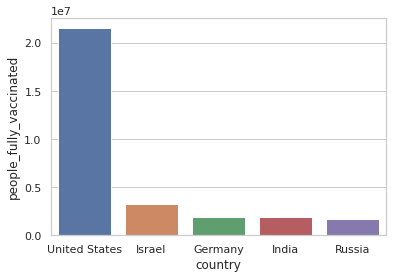

In [67]:
# Obtemos como resposta que os Estados Unidos são os que mais vacinaram pessoas.
# Vamos plotar também um gráfico de barras para vizualizarmos ainda melhor essa resposta

top_countries = order_fully_vaccinated[:5]
top_countries['country'] = top_countries.index

import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="country", y="people_fully_vaccinated", data=top_countries)
ax = ax

# Análise 3 - Progressão de vacinação do mundo

In [127]:
# Para isso, precisaremos criar uma base de dados contendo o número de vacinados crescendo a cada dia

# pd.DataFrame(df.groupby(by = 'date')['total_vaccinations'].sum()).sort_values(by = 'date')

date_groupby = df.groupby(by = 'date')
daily_vaccinations = date_groupby['date', 'daily_vaccinations'].sum()
df_daily_vaccinations = pd.DataFrame(daily_vaccinations)
df_order_daily_vaccinations = df_daily_vaccinations.sort_values(by = 'date')
df_order_daily_vaccinations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,daily_vaccinations
date,
2020-12-13,0.0
2020-12-14,167998.0
2020-12-15,167998.0
2020-12-16,358855.0
2020-12-17,358855.0
...,...
2021-02-21,5047210.0
2021-02-22,4963473.0
2021-02-23,4885049.0


In [128]:
# Agora precisaremos plotar um gráfico, e para isso utilizaremos a bibioteca seaborn -> https://seaborn.pydata.org/
# Já que iremos plotar gráficos do mesmo tipo mais vezes, eu optei por criar uma função para isso

import seaborn as sns

def plot(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x = x, y = y, data = dataset)
  ax.figure.set_size_inches(12, 6)
  ax.set_title(titulo, loc = 'left', fontsize = 18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)
  ax = ax



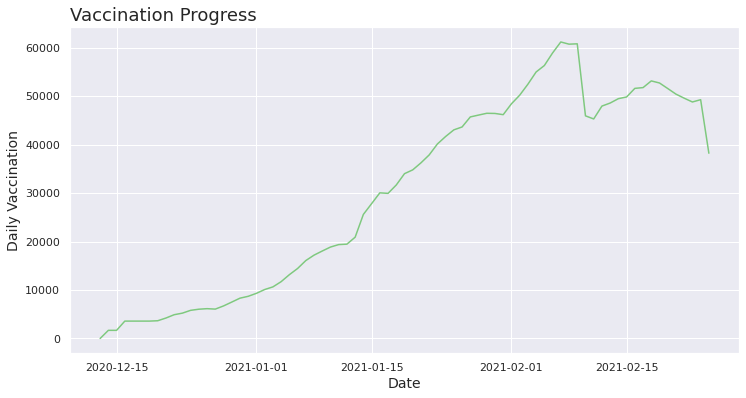

In [129]:
# Antes de plotarmos o nosso gráfico nós vamos escalar os dados de vacinação para evitar erros

df_order_daily_vaccinations['daily_vaccinations'] = daily_vaccinations['daily_vaccinations'] / 100

plot('Vaccination Progress', 'Date', 'Daily Vaccination', 'date', 'daily_vaccinations', df_order_daily_vaccinations)

In [130]:
# Agora vamos plotar um gráfico contendo o aumento de vacinação.
# Para isso vamos trocar o nome da nossa variável do DataFrame para uma menor

df_vac = df_order_daily_vaccinations

# E agora usar o método "diff" para obter o resultado

df_vac['vaccination_increase'] = df_vac['daily_vaccinations'].diff()
df_vac.head()

,daily_vaccinations,vaccination_increase
date,,
2020-12-13,0.00,NaN
2020-12-14,1679.98,1679.98
2020-12-15,1679.98,0.00
2020-12-16,3588.55,1908.57
2020-12-17,3588.55,0.00


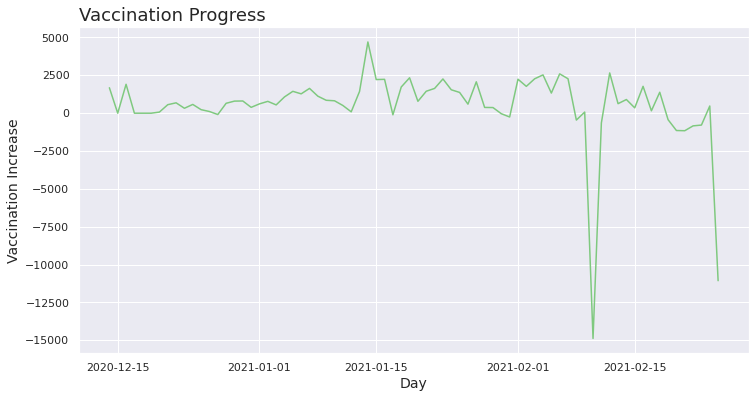

In [135]:
# Agora vamos plotar um gráfico contendo essas novas informações

plot('Vaccination Progress', 'Day', 'Vaccination Increase', 'date', 'vaccination_increase', df_vac)

In [132]:
# Com o gráfico acima, nós temos uma visão diferente da última que nos mostrava uma aceleração
# constante, já que agora nós mostra que temos no mundo picos de vacinação para no próximo termos uma queda

In [137]:
# Vamos partir para um último gráfico contendo a aceleração da vacinação

df_vac['vaccination_aceleration'] = df_vac['vaccination_increase'].diff()
df_vac.head()

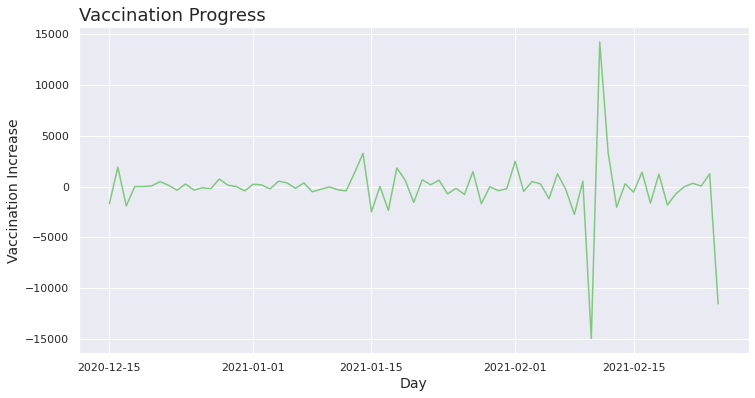

In [138]:
# Agora vamos plotar um gráfico com a aceleração do aumento das vacinas

plot('Vaccination Progress', 'Day', 'Vaccination Increase', 'date', 'vaccination_aceleration', df_vac)